**`Disclaimer`**: Because the part I majorly worked on in the project doesn't involve any dataset, I am playing around with other elements. Hope its fine..

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt


In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
image = cv2.imread("me.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

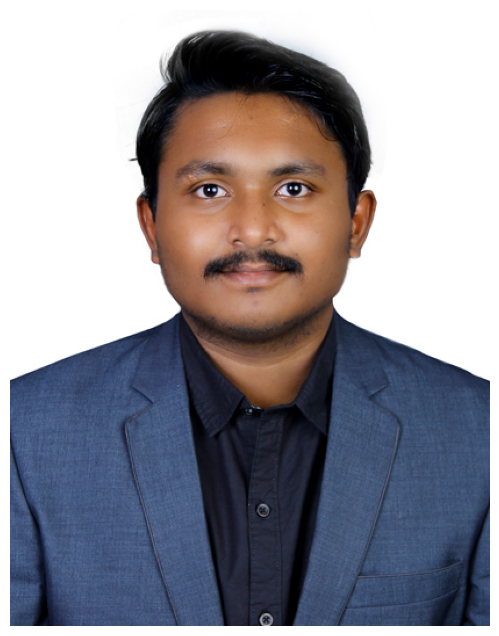

In [4]:
plt.figure(figsize=(8, 8))
d = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(d)
plt.axis('off')
plt.show()

This is the image I am going to use to show the landmarks

In [5]:
faces = detector(gray)

In [7]:
for face in faces:
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()
    padding = 30
    x1, y1 = max(0, x1 - padding), max(0, y1 - padding)
    x2, y2 = min(image.shape[1], x2 + padding), min(image.shape[0], y2 + padding)

    face_img = image[y1:y2, x1:x2]
    landmarks = predictor(gray, face)

    for i in range(0, 68):
        x = landmarks.part(i).x - x1
        y = landmarks.part(i).y - y1
        cv2.circle(face_img, (x, y), 2, (0, 255, 255), -1)
        cv2.putText(face_img, str(i+1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 255), 1) 

Visualizing the landmarks used in the model to detect blinks, yawns etc.

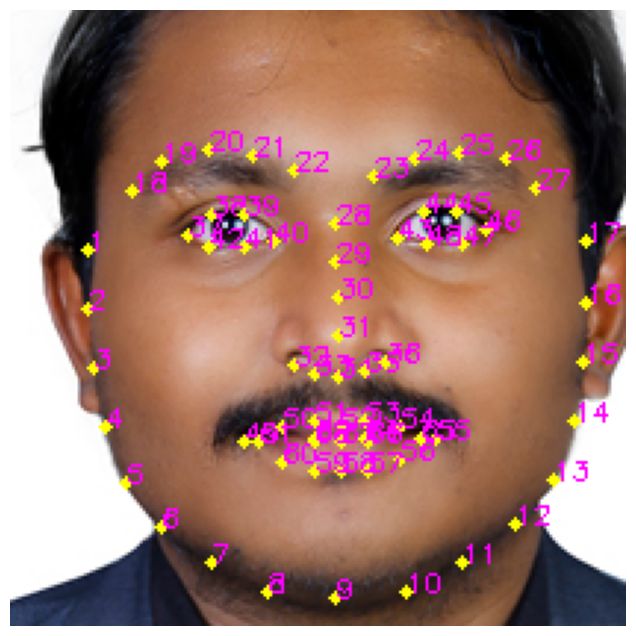

In [8]:
face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(face_img_rgb)
plt.axis('off')
plt.show()
